In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

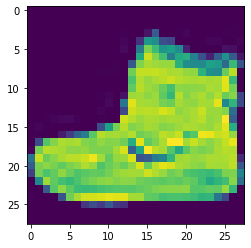

In [5]:
plt.imshow(X_train_full[0])

In [6]:
y_train_full[1]

0

    Label 	Description
    0 	T-shirt/top
    1 	Trouser
    2 	Pullover
    3 	Dress
    4 	Coat
    5 	Sandal
    6 	Shirt
    7 	Sneaker
    8 	Bag
    9 	Ankle boot

In [7]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_name[y_train_full[0]]

'Ankle boot'

In [9]:
#Random code I wrote to inspect the contents of y_train_full

from IPython.display import clear_output

def callRecurrsion(i):
    
    if i >= 0:
        print(y_train_full[i])

    else:
        return 0

    return callRecurrsion(i-1)

#callRecurrsion(59999)
clear_output()


Dress


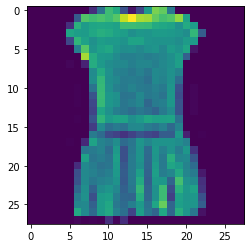

In [10]:
#print images and type together

n = 3

print(class_name[y_train_full[n]])
plt.imshow(X_train_full[n])

In [11]:
#To see numerical pixel values
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Data Normalization 

Putting all the data into a scale of 0-1 for easy understanding. 

In [12]:
X_train_n = X_train_full / 255.0 #Noramlized full trainig dataset
X_test_n = X_test/ 255.0 #

        Split Data into training, validation, and testing. 

        Training - Establish a ground for weight and biases
        Validation - Tuning hyperparameters more accurately
        Testing - An actual graded test to see if that model performed accordingly


In [13]:
X_train, X_valid = X_train_n[5000:], X_train_n[:5000]
Y_train, Y_valid = y_train_full[5000:], y_train_full[:5000]

#X_test = X_test_n tbh I find this line redundant and I'm not quite sure if the original dataset gets changed. For that reason continue
#using X_test_n for testing instead. 

Learning to create neural network models:
* Sequential Model
* Functional API

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
import pydot #Neural Network Visualization
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
weights, biases  = model.layers[1].get_weights() #The number specifies which layer the weights are received from

#In this case the second [from the top] layer which is Dense (bcs python is 0 index)

In [18]:
weights

array([[-0.04986593, -0.05086488,  0.07296753, ...,  0.01788352,
         0.0477285 ,  0.01823574],
       [-0.02126148, -0.01598443, -0.04581056, ...,  0.00715864,
         0.06246988,  0.03633376],
       [-0.03952263,  0.05719508, -0.06481018, ...,  0.06806995,
         0.01631102, -0.05362976],
       ...,
       [-0.02878685, -0.05567032, -0.03804825, ...,  0.07005405,
         0.03780676,  0.06305934],
       [ 0.00153633,  0.06636034, -0.05892414, ..., -0.05993695,
         0.01740165, -0.06544223],
       [-0.02299317, -0.07205971,  0.00733847, ...,  0.04868343,
        -0.04285669, -0.04036905]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases #All start at zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
for m in model.layers:
    print(m.name)
    print(m.get_weights())

flatten
[]
dense
[array([[-0.04986593, -0.05086488,  0.07296753, ...,  0.01788352,
         0.0477285 ,  0.01823574],
       [-0.02126148, -0.01598443, -0.04581056, ...,  0.00715864,
         0.06246988,  0.03633376],
       [-0.03952263,  0.05719508, -0.06481018, ...,  0.06806995,
         0.01631102, -0.05362976],
       ...,
       [-0.02878685, -0.05567032, -0.03804825, ...,  0.07005405,
         0.03780676,  0.06305934],
       [ 0.00153633,  0.06636034, -0.05892414, ..., -0.05993695,
         0.01740165, -0.06544223],
       [-0.02299317, -0.07205971,  0.00733847, ...,  0.04868343,
        -0.04285669, -0.04036905]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [29]:
model_history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2222 - accuracy: 0.9201 - val_loss: 0.3006 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2185 - accuracy: 0.9213 - val_loss: 0.3019 - val_accuracy: 0.8926
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2143 - accuracy: 0.9233 - val_loss: 0.2975 - val_accuracy: 0.8920
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2119 - accuracy: 0.9236 - val_loss: 0.2928 - val_accuracy: 0.8904
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2080 - accuracy: 0.9247 - val_loss: 0.2917 - val_accuracy: 0.8946
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2045 - accuracy: 0.9263 - val_loss: 0.3115 - val_accuracy: 0.8846
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2012 - accuracy: 0.9286 - val_loss: 0.3177 - val_accuracy:

In [26]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
model_history.history

{'loss': [0.7156843543052673,
  0.4853636622428894,
  0.4412091374397278,
  0.4133906960487366,
  0.39270833134651184,
  0.3766949474811554,
  0.3639829456806183,
  0.352845162153244,
  0.342696875333786,
  0.3326345384120941,
  0.32378295063972473,
  0.31603288650512695,
  0.30878695845603943,
  0.30244794487953186,
  0.2961008846759796,
  0.2898692786693573,
  0.2840999364852905,
  0.2782908082008362,
  0.27355635166168213,
  0.2681567668914795,
  0.26255908608436584,
  0.25885438919067383,
  0.25431451201438904,
  0.24975845217704773,
  0.245222270488739,
  0.24122807383537292,
  0.23713788390159607,
  0.23385272920131683,
  0.22874493896961212,
  0.22567211091518402],
 'accuracy': [0.7665636539459229,
  0.831890881061554,
  0.8460909128189087,
  0.8552727103233337,
  0.8619818091392517,
  0.8674727082252502,
  0.8718181848526001,
  0.8752727508544922,
  0.8777818083763123,
  0.8820000290870667,
  0.8830363750457764,
  0.8857091069221497,
  0.8894727230072021,
  0.8914363384246826,


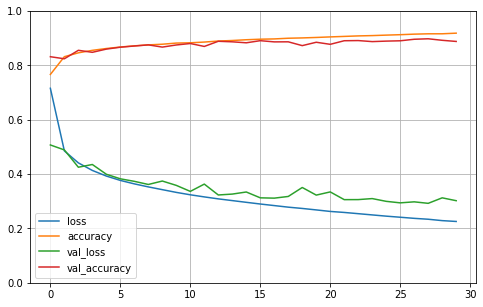

In [28]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
#saving Keras model

model.save(r'C:\maximusRepository\yeeunPersonal\onlineCourseCode\udemyNeuralNetworks')

INFO:tensorflow:Assets written to: C:\maximusRepository\yeeunPersonal\onlineCourseCode\udemyNeuralNetworks\assets
